<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
from plotly import tools
init_notebook_mode(connected=True)

### Import the dataset.

In [2]:
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


### Check the shape of the dataset.

In [3]:
def lr():
    return car.shape 
lr()

(156, 16)

### Check the descriptive stats of the dataset.

In [4]:
def lr():
    return car.describe()
lr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Q 1. Write a code to understand the total count and percentage of missing values.

In [5]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

                    Total   Percent
Sales_in_thousands  5      0.032051
Power_perf_factor   0      0.000000
Latest_Launch       0      0.000000
Fuel_efficiency     0      0.000000
Fuel_capacity       0      0.000000
Curb_weight         0      0.000000
Length              0      0.000000
Width               0      0.000000
Wheelbase           0      0.000000
Horsepower          0      0.000000
Engine_size         0      0.000000
Price_in_thousands  0      0.000000
Vehicle_type        0      0.000000
_year_resale_value  0      0.000000
Model               0      0.000000
Manufacturer        0      0.000000


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [6]:
def lr():
    car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
    return
lr()
print (car.isnull().sum())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


### Q 3. Create a dummy variable for "Vehicle_type"  and  drop the original variable.

In [7]:
car_dummy =pd.DataFrame()                                                           # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
    return dummies
car_dummy = lr(car)
# print(car_dummy)
car_dummy

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Passenger
0,Acura,Integra,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,1
1,Acura,TL,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,1
2,Acura,CL,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,1
3,Acura,RL,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,9/21/2011,66.498812,1
152,Volvo,S70,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,11/24/2012,70.654495,1
153,Volvo,V70,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,6/25/2011,71.155978,1
154,Volvo,C70,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,4/26/2011,101.623357,1


### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [8]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
# print (car_dummy)
car_dummy

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1
2,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000,1
3,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779,1
4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,66.498812,1
152,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,70.654495,1
153,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,71.155978,1
154,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,101.623357,1


### Check for outliers using Box Plot

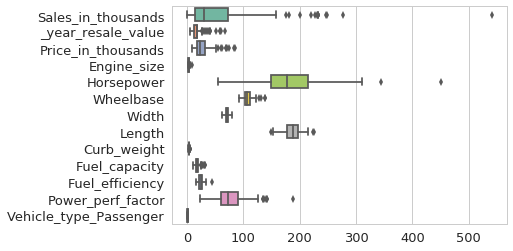

In [9]:
def lr():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr()

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [10]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
# print (car_dummy)
car_dummy

    Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
38  0.916               58.470              69.725              8.0           
55  540.561             15.075              26.935              4.6           

    Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
38  450         96.2       75.7   176.7   3.375        19.0            
55  220         138.5      79.1   224.5   4.241        25.1            

    Fuel_efficiency  Power_perf_factor  Vehicle_type_Passenger  
38  16               188.144323         1                       
55  18               89.401935          0                       


,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1
2,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000,1
3,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779,1
4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,66.498812,1
152,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,70.654495,1
153,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,71.155978,1
154,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,101.623357,1


### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [14]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
# print(std[1])
std

array([[-0.15270566, -0.40386698, -1.26877133, ...,  0.97191732,
        -0.76842508,  0.58234907],
       [ 0.2147879 ,  0.09116773,  0.18859201, ...,  0.25690808,
         0.64045582,  0.58234907],
       [ 0.04228025,  0.13421423,  0.18859201, ...,  0.4952445 ,
         0.59678186,  0.58234907],
       ...,
       [ 0.02638605,  0.11986539, -0.64418704, ...,  0.25690808,
        -0.22021826,  0.58234907],
       [ 0.02638605,  1.31799289, -0.74828442, ..., -0.21976475,
         1.07697408,  0.58234907],
       [ 0.02638605,  0.63642335, -0.12370014, ...,  0.01857167,
         0.40053237,  0.58234907]])

### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [18]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
cars

,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,-0.152706,-0.403867,-1.268771,-0.835991,-0.856756,-1.114212,-1.126791,-1.172960,-1.218395,0.971917,-0.768425,0.582349
1,0.214788,0.091168,0.188592,0.778515,0.103064,-0.227296,0.436986,0.226478,-0.181177,0.256908,0.640456,0.582349
2,0.042280,0.134214,0.188592,0.778515,-0.063862,-0.138605,0.368332,0.151565,-0.181177,0.495244,0.596782,0.582349
3,1.244606,1.066888,0.500884,0.493602,1.007242,0.097906,0.719229,0.757244,0.026267,-0.458101,0.641265,0.582349
4,0.463617,-0.225224,-1.268771,-0.646049,-0.662010,-0.848137,-0.699613,-0.600753,-0.388620,0.733581,-0.576938,0.582349
...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.026386,-0.195809,-1.164674,-0.456107,-0.954129,-1.025520,-0.806408,-0.530621,-0.544203,0.256908,-0.418504,0.582349
150,0.026386,0.026598,-0.644187,-0.304154,-0.342070,-0.522935,-0.096987,-0.266035,0.000337,0.256908,-0.241570,0.582349
151,0.026386,0.119865,-0.644187,-0.304154,-0.342070,-0.522935,-0.074102,-0.184747,0.000337,0.256908,-0.220218,0.582349
152,0.026386,1.317993,-0.748284,0.987451,-0.342070,0.127470,-0.112243,0.360365,0.155920,-0.219765,1.076974,0.582349


### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [19]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

     Price_in_thousands  Engine_size  Wheelbase  Fuel_efficiency  \
0   -0.403867           -1.268771    -0.856756   0.971917          
1    0.091168            0.188592     0.103064   0.256908          
2    0.134214            0.188592    -0.063862   0.495244          
3    1.066888            0.500884     1.007242  -0.458101          
4   -0.225224           -1.268771    -0.662010   0.733581          
..        ...                 ...          ...        ...          
149 -0.195809           -1.164674    -0.954129   0.256908          
150  0.026598           -0.644187    -0.342070   0.256908          
151  0.119865           -0.644187    -0.342070   0.256908          
152  1.317993           -0.748284    -0.342070  -0.219765          
153  0.636423           -0.123700     0.353451   0.018572          

     Vehicle_type_Passenger  
0    0.582349                
1    0.582349                
2    0.582349                
3    0.582349                
4    0.582349                
.. 

### Check for the type and shape of X.

In [20]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(154, 5)


### Q 9. Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [21]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['Sales_in_thousands']
    return y
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3    8.588 
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [22]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(154,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [24]:
from sklearn.cross_validation import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = lr()

### Check the shape of  X and y of train dataset.

In [25]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(107, 5)
(107,)


### Check the shape of X and y of test dataset.

In [26]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(47, 5)
(47,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [27]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

### Q12. Fit the linear model on X_train and y_train.

In [28]:
def lr():
    linreg.fit(X_train, y_train)
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [29]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 54.799449887479796
Coefficients: [-34.31886407  15.72311289  14.44766121   1.85806809  -0.48786904]


### Q.14 Zip the features to pair the feature names with the coefficients.

In [30]:
def lr():
    feature_cols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 54.799449887479796
Price_in_thousands -34.31886407296335
Engine_size 15.723112890831636
Wheelbase 14.447661212265665
Fuel_efficiency 1.8580680932809717
Vehicle_type_Passenger -0.4878690445625889


###  Q 15. Predict the train value using the built model.

In [31]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['Sales']
    head = pred.head()
    return head
lr()

,Sales
0,53.416651
1,68.933147
2,68.246112
3,34.094284
4,68.870887


### Q 16. Predict the test value using the built model.

In [32]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['Sales']
    head = pred_test.head()
    return head
lr()

,Sales
0,53.079190
1,68.257593
2,27.775838
3,45.468436
4,66.711264


<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [33]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 40.88098210192519
MAE for test set is 39.65688149451963


### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [34]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 3458.107513092643
MSE for test set is 2877.9380668138374


### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [35]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 58.80567585780001
RMSE for test set is 53.646417092046676


### Q 20. Evaluate the model using R-square value for both train and test.

In [36]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.20693342971854856
R2 for test set is 0.18716596176154165
